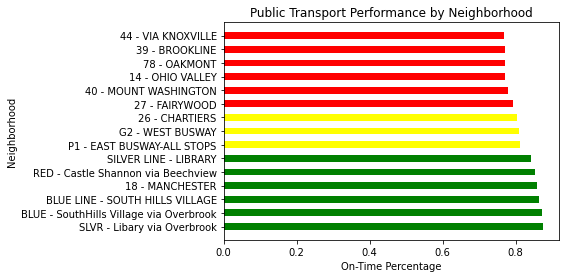

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/bus.csv")

grouped = df.groupby('route_full_name')['on_time_percent'].mean().nlargest(15).reset_index()

colors = []
for percentage in grouped['on_time_percent']:
    if percentage >= 0.82:
        colors.append('green')
    elif percentage >= 0.8:
        colors.append('yellow')
    else:
        colors.append('red')

plt.figure()
plt.barh(grouped['route_full_name'], grouped['on_time_percent'], color=colors, height = .5)

plt.title('Public Transport Performance by Neighborhood')
plt.xlabel('On-Time Percentage')
plt.ylabel('Neighborhood')

plt.show()


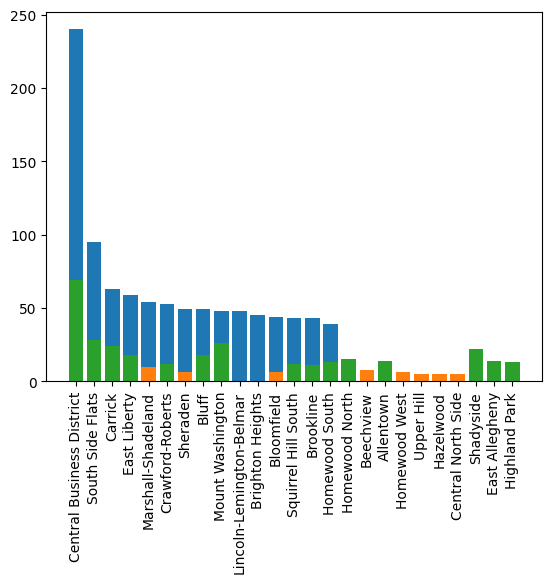

In [19]:
data = pd.read_csv("datasets/crime.csv")
crime_count = data["INCIDENTNEIGHBORHOOD"].value_counts()

# The violent crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
violent_crimes = ['AGG-ASSAULT', 'AGG. INDECENT ASSAULT W/ UNCONSCIOUS PERSON', 'CRIMINAL HOMICIDE', 'INDECENT ASSAULT',
                  'RAPE', 'RECKLESSLY ENDANGER ANOTH PER', 'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'SEXUAL ASSAULT', 'SIMPLE ASSAULT']
violent_data = data[data["INCIDENTHIERARCHYDESC"].isin(violent_crimes)]
violent_crime_count = violent_data["INCIDENTNEIGHBORHOOD"].value_counts()

# The money crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
money_crimes = ['BAD CHECKS', 'BURGLARY', 'CREDIT CARDS', 'FORGERY', 'FOUND PROPERTY', 'GAMBLING INVESTIGATION', 'LOST PROPERTY', 'RECEIVING STOLEN PROPERTY',
                'RETSIL THEFT (SHOPLIFTING)', 'STOLEN PROPERTY - OTHER', 'THEFT', 'THEFT BY DECEPTION', 'THEFT BY EXTORTION', 'THEFT FROM AUTO', 'THEFT OF SERVICES']
money_data = data[data["INCIDENTHIERARCHYDESC"].isin(money_crimes)]
money_crime_count = money_data["INCIDENTNEIGHBORHOOD"].value_counts()

other_data = data[~data["INCIDENTHIERARCHYDESC"].isin(violent_crimes + money_crimes)]
other_crime_count = other_data["INCIDENTNEIGHBORHOOD"].value_counts()

relevant_crime_data = [other_crime_count.nlargest(15), violent_crime_count.nlargest(15), money_crime_count.nlargest(15)]
for d in relevant_crime_data:
    plt.bar(d.index, d.values)

plt.xticks(rotation=90)
plt.show()

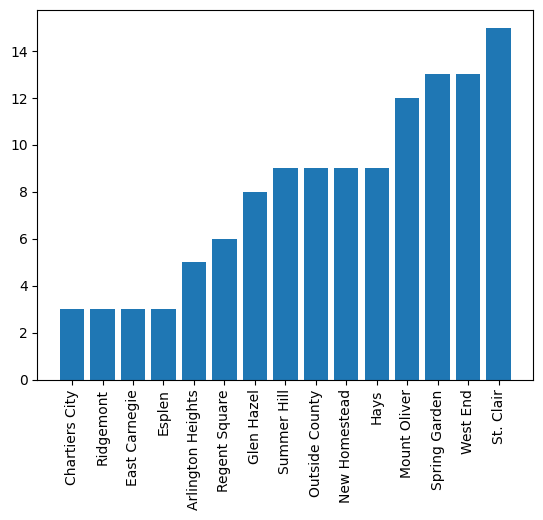

In [21]:
weighted_crimes = crime_count.to_dict()
for k, v in violent_crime_count.items():
    weighted_crimes[k] = v
for k, v in money_crime_count.items():
    weighted_crimes[k] += v * 2
for k, v in other_crime_count.items():
    weighted_crimes[k] += v * 2

weighted_crime_count = pd.Series(weighted_crimes).nsmallest(15)

plt.bar(weighted_crime_count.index, weighted_crime_count.values)
plt.xticks(rotation=90)
plt.show()